# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [35]:
# import package
import requests
import seaborn
import matplotlib.pyplot as plt
import pandas as pd
import re
from bs4 import BeautifulSoup

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [3]:
# setting each station name and their url
r=requests.get("https://www.thsrc.com.tw/")
soup=BeautifulSoup(r.text,'html.parser')

a=soup.find_all(tabindex="2",target="_self")
c=[]
for i in a:
    c.append(i.get("href"))
c=c[27:38]


In [4]:
# crawler the address of each station
station=[]
add=[]
oper=[]
tick=[]
x=[]
for i in c:
    b=[]
    f="https://www.thsrc.com.tw/"+i
    r=requests.get(f)
    soup=BeautifulSoup(r.text,'html.parser')
    a=soup.find_all(class_="col-md-4")
    
    aa=soup.find(class_="si-title")
    print(aa)
    station.append(aa.text)
    for i in a:
        b.append(i.text)
    x.append(b)
x  

<div class="si-title">台北站</div>
<div class="si-title">板橋站</div>
<div class="si-title">桃園站</div>
<div class="si-title">新竹站</div>
<div class="si-title">苗栗站</div>
<div class="si-title">台中站</div>
<div class="si-title">彰化站</div>
<div class="si-title">雲林站</div>
<div class="si-title">嘉義站</div>
<div class="si-title">台南站</div>
<div class="si-title">左營站</div>


[['\n\n\n\n\n台北市北平西路3號\n\n\n\n營業時間：06:00 ~ 24:00\n\n\n售票時間：06:00 ~ 末班車發車時間\n\n\n\n'],
 ['\n\n\n\n\n新北市板橋區縣民大道二段7號\n\n\n\n營業時間：06:00 ~ 24:00\n\n\n售票時間：06:00 ~ 末班車發車時間\n\n\n\n'],
 ['\n\n\n\n\n桃園市中壢區高鐵北路一段6號\n\n\n\n營業時間：06:20 ~ 23:45\n\n\n售票時間：06:20 ~ 末班車發車時間 \n\n\n\n'],
 ['\n\n\n\n\n新竹縣竹北市高鐵七路6號\n\n\n\n營業時間：06:15 ~ 23:45\n\n\n售票時間：06:15 ~ 末班車發車時間\n\n\n\n'],
 ['\n\n\n\n\n苗栗縣後龍鎮高鐵三路268號\n\n\n\n營業時間：06:05 ~ 23:45\n\n\n售票時間：06:05 ~ 末班車發車時間\n\n\n\n'],
 ['\n\n\n\n\n台中市烏日區站區二路8號\n\n\n\n營業時間：05:40 ~ 24:00\n\n\n售票時間：05:40 ~ 末班車發車時間\n\n\n\n\n\n\n\n\n\n'],
 ['\n\n\n\n\n彰化縣田中鎮站區路二段99號\n\n\n\n營業時間：06:20 ~ 24:00\n\n\n售票時間：06:20~末班車發車時間\n\n\n\n\n\n\n'],
 ['\n\n\n\n\n雲林縣虎尾鎮站前東路301號\n\n\n\n營業時間：06:15 ~ 23:45\n\n\n售票時間：06:15~末班車發車時間\n\n\n\n\n\n\n'],
 ['\n\n\n\n\n嘉義縣太保市高鐵西路168號\n\n\n\n營業時間：06:00 ~ 23:45\n\n\n售票時間：06:00~末班車發車時間\n\n\n\n'],
 ['\n\n\n\n\n台南市歸仁區歸仁大道100號\n\n\n\n營業時間：05:45 ~ 24:00\n\n\n售票時間：05:45~末班車發車時間 \n\n\n\n'],
 ['\n\n\n\n\n高雄市左營區高鐵路105號\n\n\n\n營業時間：05:25 ~ 24:00\n\n\n售票時間：05:25~末班車發車時間 \n\n

In [5]:
# crawler the operation hours and ticketing hours of each station
for i in x:
    for c in i:
        b=c.split("\n")
        b=list(filter(None, b))
        add.append(b[0])
        oper.append(b[1][5:])
        tick.append(b[2][5:])
        

In [6]:
# create a DataFrame
d=pd.DataFrame({'station':station, 'address':add,"operation_hours":oper,"ticketing_hours":tick})
d

,station,address,operation_hours,ticketing_hours
0,台北站,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
1,板橋站,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,桃園站,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
3,新竹站,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
4,苗栗站,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
5,台中站,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
6,彰化站,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
7,雲林站,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
8,嘉義站,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間
9,台南站,台南市歸仁區歸仁大道100號,05:45 ~ 24:00,05:45~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [38]:
# crawler GDP
r=requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
soup=BeautifulSoup(r.text,'html.parser')

a=soup.find_all("tr")
c=[]
for i in a:
    c.append(i.text)
bb=[]
for i in c[5:55]:
    b=i.split("\n")
    b=list(filter(None, b))
    bb.append(b)
    bb=list(filter(None, bb)) 
bb    

[['\xa0United States',
  'Americas',
  '22,675,271',
  '2021',
  '21,433,226',
  '2019',
  '20,936,600',
  '2020'],
 ['\xa0China',
  'Asia',
  '16,642,318',
  '[n 2]2021',
  '14,342,933',
  '[n 3]2019',
  '14,722,731',
  '2020'],
 ['\xa0Japan',
  'Asia',
  '5,378,136',
  '2021',
  '5,082,465',
  '2019',
  '4,975,415',
  '2020'],
 ['\xa0Germany',
  'Europe',
  '4,319,286',
  '2021',
  '3,861,123',
  '2019',
  '3,806,060',
  '2020'],
 ['\xa0United Kingdom',
  'Europe',
  '3,124,650',
  '2021',
  '2,826,441',
  '2019',
  '2,707,744',
  '2020'],
 ['\xa0India',
  'Asia',
  '3,049,704',
  '2021',
  '2,891,582',
  '2019',
  '2,622,984',
  '2020'],
 ['\xa0France',
  'Europe',
  '2,938,271',
  '2021',
  '2,715,518',
  '2019',
  '2,603,004',
  '2020'],
 ['\xa0Italy',
  'Europe',
  '2,106,287',
  '2021',
  '2,003,576',
  '2019',
  '1,886,445',
  '2020'],
 ['\xa0Canada',
  'Americas',
  '1,883,487',
  '2021',
  '1,741,496',
  '2019',
  '1,643,408',
  '2020'],
 ['\xa0South Korea',
  'Asia',
  '1,80

In [39]:
# create GDP DataFrame
df=pd.DataFrame(bb,columns=["Country","Region","IMF_Estimate",'IMF_Year',"United_Nations_Estimate","United_Nations_Year","World_Bank_Estimate","World_Bank_Year"])
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        df.iloc[i][j]=df.iloc[i][j].replace(',','')
        df.iloc[i][j]=df.iloc[i][j].replace('\xa0','')
        if "]" in df.iloc[i][j]:
            df.iloc[i][j]=df.iloc[i][j][5:]
df


,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020
1,China,Asia,16642318,2021,14342933,2019,14722731,2020
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020
5,India,Asia,3049704,2021,2891582,2019,2622984,2020
6,France,Europe,2938271,2021,2715518,2019,2603004,2020
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020


In [40]:
# crawler CPI
r=requests.get("https://en.wikipedia.org/wiki/Corruption_Perceptions_Index")
soup=BeautifulSoup(r.text,'html.parser')

a=soup.find_all("tr")
c=[]
for i in a:
    c.append(i.text)
bb=[]
for i in c[23:123]:
    b=i.split("\n")
    b=list(filter(None, b))
    bb.append(b)
    bb=list(filter(None, bb)) 
cou=[]
cpi=[]
xx={}
for i in bb:
    cou.append(i[1].replace("\xa0",""))
    cpi.append(i[2])
    xx[i[1].replace("\xa0","")]=i[2]

d=pd.DataFrame({'Country':cou, 'CPI_2020':cpi})    
d


,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [41]:
df3=pd.merge(df, d, how='inner',on="Country")
df3

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,22675271,2021,21433226,2019,20936600,2020,67
1,China,Asia,16642318,2021,14342933,2019,14722731,2020,42
2,Japan,Asia,5378136,2021,5082465,2019,4975415,2020,74
3,Germany,Europe,4319286,2021,3861123,2019,3806060,2020,80
4,United Kingdom,Europe,3124650,2021,2826441,2019,2707744,2020,77
5,India,Asia,3049704,2021,2891582,2019,2622984,2020,40
6,France,Europe,2938271,2021,2715518,2019,2603004,2020,69
7,Italy,Europe,2106287,2021,2003576,2019,1886445,2020,53
8,Canada,Americas,1883487,2021,1741496,2019,1643408,2020,77
9,South Korea,Asia,1806707,2021,1646539,2019,1630525,2020,61


In [42]:
# merge GDP and CPI DataFrame


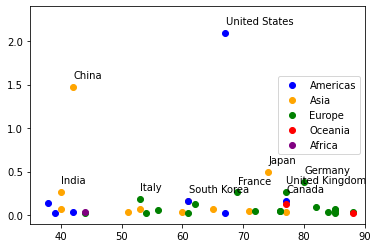

In [43]:
# plot
plt.figure()
for i in range(len(df3)):
    if i<10:
        x=int(df3.loc[i]['CPI_2020'])
        y=int(df3.loc[i]['World_Bank_Estimate'])/10000000
        if df3.loc[i]['Region']=='Americas':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Asia':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Europe':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Oceania':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)
        elif df3.loc[i]['Region']=='Africa':
            plt.text(x+0.1,y+0.1,df3.loc[i]['Country'],fontsize=10)

am=df3[df3['Region']=='Americas']
asia=df3[df3['Region']=='Asia']
e=df3[df3['Region']=='Europe']
o=df3[df3['Region']=='Oceania']
af=df3[df3['Region']=='Africa']
am_y=[]
am_x=[]
for i in am['CPI_2020']:
    am_x.append(int(i))
for i in am['World_Bank_Estimate']:
    am_y.append(int(i)/10000000)
plt.scatter(am_x,am_y,c='blue',label='Americas')
asia_y=[]
asia_x=[]
for i in asia['CPI_2020']:
    asia_x.append(int(i))
for i in asia['World_Bank_Estimate']:
    asia_y.append(int(i)/10000000)
plt.scatter(asia_x,asia_y,c='orange',label='Asia')
e_y=[]
e_x=[]
for i in e['CPI_2020']:
    e_x.append(int(i))
for i in e['World_Bank_Estimate']:
    e_y.append(int(i)/10000000)
plt.scatter(e_x,e_y,c='green',label='Europe')
o_y=[]
o_x=[]
for i in o['CPI_2020']:
    o_x.append(int(i))
for i in o['World_Bank_Estimate']:
    o_y.append(int(i)/10000000)
plt.scatter(o_x,o_y,c='red',label='Oceania')
af_y=[]
af_x=[]
for i in af['CPI_2020']:
    af_x.append(int(i))
for i in af['World_Bank_Estimate']:
    af_y.append(int(i)/10000000)
plt.scatter(af_x,af_y,c='purple',label='Africa')
plt.scatter(x,y,c='blue',label='Americas')

plt.xlim([35,90])
plt.ylim([-0.1,2.4])
plt.legend(labels=['Americas','Asia','Europe','Oceania','Africa'],loc='right')

plt.show()
    